# Random Forest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Cancer_Dataset.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)

data.diagnosis = [1 if each=="M" else 0 for each in data.diagnosis]

In [4]:
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

x = (x_data-np.min(x_data)) / (np.max(x_data)-np.min(x_data))

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("Decision Tree Score:", dt.score(x_test,y_test))

Decision Tree Score: 0.956140350877193


In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=17)
rf.fit(x_train,y_train)

print("Random Forest Score:", rf.score(x_test,y_test))

Random Forest Score: 0.9649122807017544


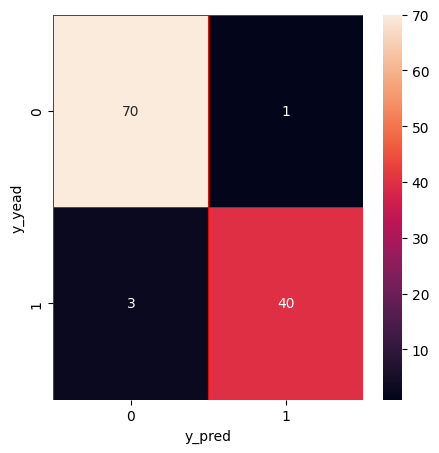

In [11]:
y_head = rf.predict(x_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_head)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='.0f', linewidths=0.5, linecolor="red", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_yead")
plt.show()